# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


In [4]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

city_url =  url + "&q=" + "London"

city_weather = requests.get(city_url).json()


city_weather 

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 21.52,
  'feels_like': 21.14,
  'temp_min': 18.77,
  'temp_max': 22.81,
  'pressure': 1018,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 240},
 'clouds': {'all': 100},
 'dt': 1688901901,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1688874828,
  'sunset': 1688933827},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather) 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waingapu
{'coord': {'lon': 120.2641, 'lat': -9.6567}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.46, 'feels_like': 25.08, 'temp_min': 24.46, 'temp_max': 24.46, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.2, 'deg': 123, 'gust': 7.98}, 'clouds': {'all': 83}, 'dt': 1688902409, 'sys': {'country': 'ID', 'sunrise': 1688854579, 'sunset': 1688896283}, 'timezone': 28800, 'id': 1622318, 'name': 'Waingapu', 'cod': 200}
Processing Record 2 of Set 1 | port-aux-francais
{'coord': {'lon': 70.2167, 'lat': -49.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.24, 'feels_like': -4.77, 'temp_min': 1.24, 'temp_max': 1.24, 'pressure': 994, 'humidity': 55, 'sea_level': 994, 'g

{'coord': {'lon': -130.1015, 'lat': -25.066}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.26, 'feels_like': 21.22, 'temp_min': 21.26, 'temp_max': 21.26, 'pressure': 1026, 'humidity': 68, 'sea_level': 1026, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.1, 'deg': 97, 'gust': 6.01}, 'clouds': {'all': 99}, 'dt': 1688902411, 'sys': {'country': 'PN', 'sunrise': 1688916344, 'sunset': 1688954706}, 'timezone': -28800, 'id': 4030723, 'name': 'Adamstown', 'cod': 200}
Processing Record 17 of Set 1 | ola
{'coord': {'lon': 151.2833, 'lat': 59.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.97, 'feels_like': 13.77, 'temp_min': 13.97, 'temp_max': 13.97, 'pressure': 996, 'humidity': 90, 'sea_level': 996, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 0.91, 'deg': 86, 'gust': 1.54}, 'clouds': {'all

{'coord': {'lon': 105.6791, 'lat': -10.4217}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.82, 'feels_like': 25.66, 'temp_min': 24.82, 'temp_max': 24.82, 'pressure': 1012, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 110}, 'clouds': {'all': 100}, 'dt': 1688902155, 'sys': {'type': 1, 'id': 9592, 'country': 'CX', 'sunrise': 1688858157, 'sunset': 1688899706}, 'timezone': 25200, 'id': 2078127, 'name': 'Flying Fish Cove', 'cod': 200}
Processing Record 33 of Set 1 | rio grande
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.75, 'feels_like': 12.25, 'temp_min': 11.06, 'temp_max': 12.75, 'pressure': 1019, 'humidity': 83, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 2.76, 'deg': 92, 'gust': 6.41}, 'clouds': {'all': 100}, 'd

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 49 of Set 1 | new norfolk
{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.09, 'feels_like': 11.47, 'temp_min': 11.72, 'temp_max': 12.18, 'pressure': 1004, 'humidity': 81, 'sea_level': 1004, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 5.69, 'deg': 282, 'gust': 17.38}, 'clouds': {'all': 100}, 'dt': 1688902416, 'sys': {'type': 2, 'id': 2002195, 'country': 'AU', 'sunrise': 1688852477, 'sunset': 1688885523}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
Processing Record 50 of Set 1 | albany
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.49, 'feels_like': 22.12, 'temp_min': 19.58, 'temp_max': 23.23, 'pressur

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 14 of Set 2 | uturoa
{'coord': {'lon': -151.4333, 'lat': -16.7333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.82, 'feels_like': 29.18, 'temp_min': 26.82, 'temp_max': 26.82, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 9.52, 'deg': 86, 'gust': 11.91}, 'clouds': {'all': 14}, 'dt': 1688902418, 'sys': {'country': 'PF', 'sunrise': 1688920522, 'sunset': 1688960768}, 'timezone': -36000, 'id': 4033205, 'name': 'Uturoa', 'cod': 200}
Processing Record 15 of Set 2 | northport
{'coord': {'lon': -87.5772, 'lat': 33.229}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 21.77, 'feels_like': 22.3, 'temp_min': 21.61, 'temp_max': 22.27, 'pressure': 1013, 'humidity': 88}, 'visibility': 8047, 'wind

{'coord': {'lon': 55.0988, 'lat': 51.7727}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.01, 'feels_like': 36.46, 'temp_min': 37.81, 'temp_max': 38.01, 'pressure': 1008, 'humidity': 19, 'sea_level': 1008, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 169, 'gust': 3.76}, 'clouds': {'all': 90}, 'dt': 1688901886, 'sys': {'type': 1, 'id': 9044, 'country': 'RU', 'sunrise': 1688861482, 'sunset': 1688920663}, 'timezone': 18000, 'id': 515003, 'name': 'Orenburg', 'cod': 200}
Processing Record 30 of Set 2 | kafue
{'coord': {'lon': 28.1814, 'lat': -15.7691}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.94, 'feels_like': 25.16, 'temp_min': 25.94, 'temp_max': 25.94, 'pressure': 1016, 'humidity': 22, 'sea_level': 1016, 'grnd_level': 908}, 'visibility': 10000, 'wind': {'speed': 2.5, 'deg': 282, 'gust': 3.11},

{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 14.03, 'feels_like': 13.63, 'temp_min': 14.03, 'temp_max': 14.45, 'pressure': 1014, 'humidity': 82}, 'visibility': 3000, 'wind': {'speed': 0.51, 'deg': 0}, 'clouds': {'all': 11}, 'dt': 1688902422, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1688902150, 'sunset': 1688943032}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
Processing Record 44 of Set 2 | huaicheng
{'coord': {'lon': 112.1931, 'lat': 23.9051}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.52, 'feels_like': 32.37, 'temp_min': 28.52, 'temp_max': 28.52, 'pressure': 1007, 'humidity': 74, 'sea_level': 1007, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 0.48, 'deg': 257, 'gu

{'coord': {'lon': 92, 'lat': 31.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 14.85, 'feels_like': 13.96, 'temp_min': 14.85, 'temp_max': 14.85, 'pressure': 999, 'humidity': 60, 'sea_level': 999, 'grnd_level': 594}, 'visibility': 10000, 'wind': {'speed': 3.03, 'deg': 187, 'gust': 5.81}, 'rain': {'1h': 0.87}, 'clouds': {'all': 48}, 'dt': 1688902425, 'sys': {'country': 'CN', 'sunrise': 1688856838, 'sunset': 1688907593}, 'timezone': 28800, 'id': 1280517, 'name': 'Nagqu Prefecture', 'cod': 200}
Processing Record 8 of Set 3 | barpali
{'coord': {'lon': 83.5833, 'lat': 21.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.11, 'feels_like': 34.35, 'temp_min': 30.11, 'temp_max': 30.11, 'pressure': 1003, 'humidity': 66, 'sea_level': 1003, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 5.03, 'deg': 259, 'gust': 7.29}, 'clou

{'coord': {'lon': 18.2603, 'lat': 0.0487}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 29.61, 'feels_like': 30.78, 'temp_min': 29.61, 'temp_max': 29.61, 'pressure': 1011, 'humidity': 52, 'sea_level': 1011, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 1.13, 'deg': 345, 'gust': 1.51}, 'clouds': {'all': 30}, 'dt': 1688902427, 'sys': {'country': 'CD', 'sunrise': 1688878094, 'sunset': 1688921735}, 'timezone': 3600, 'id': 2312895, 'name': 'Mbandaka', 'cod': 200}
Processing Record 22 of Set 3 | alta
{'coord': {'lon': 23.2717, 'lat': 69.9689}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.88, 'feels_like': 12.1, 'temp_min': 12.88, 'temp_max': 14.59, 'pressure': 1024, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1688902427, 'sys': {'type': 2, 'id': 2012462, 'co

{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.87, 'feels_like': 14.37, 'temp_min': 15.87, 'temp_max': 15.87, 'pressure': 1021, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 160}, 'clouds': {'all': 3}, 'dt': 1688902429, 'sys': {'type': 1, 'id': 9495, 'country': 'AU', 'sunrise': 1688851139, 'sunset': 1688890488}, 'timezone': 36000, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
Processing Record 38 of Set 3 | aykhal
{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 24.72, 'feels_like': 24.21, 'temp_min': 24.72, 'temp_max': 24.72, 'pressure': 1004, 'humidity': 37, 'sea_level': 1004, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 6.38, 'deg': 255, 'gust': 9.61}, 'clouds': {'all': 32}, 'dt': 1688902429, 'sys': {'countr

{'coord': {'lon': 103.7714, 'lat': 53.153}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 21.62, 'feels_like': 22.08, 'temp_min': 21.62, 'temp_max': 21.62, 'pressure': 1004, 'humidity': 86, 'sea_level': 1004, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 2.78, 'deg': 341, 'gust': 5.01}, 'rain': {'1h': 0.19}, 'clouds': {'all': 95}, 'dt': 1688902431, 'sys': {'country': 'RU', 'sunrise': 1688849333, 'sunset': 1688909446}, 'timezone': 28800, 'id': 2026544, 'name': 'Bokhan', 'cod': 200}
Processing Record 4 of Set 4 | noumea
{'coord': {'lon': 166.4572, 'lat': -22.2763}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.67, 'feels_like': 22.48, 'temp_min': 16.99, 'temp_max': 21.67, 'pressure': 1018, 'humidity': 99}, 'visibility': 10000, 'wind': {'speed': 1.73, 'deg': 164, 'gust': 2.01}, 'clouds': {'all': 51}, 'dt': 1688902431

{'coord': {'lon': -7.6833, 'lat': 8.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.26, 'feels_like': 31.16, 'temp_min': 29.26, 'temp_max': 29.26, 'pressure': 1014, 'humidity': 58, 'sea_level': 1014, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 1.92, 'deg': 117, 'gust': 3.61}, 'clouds': {'all': 67}, 'dt': 1688902433, 'sys': {'country': 'CI', 'sunrise': 1688883498, 'sunset': 1688928785}, 'timezone': 0, 'id': 2280376, 'name': 'Touba', 'cod': 200}
Processing Record 18 of Set 4 | klyuchi
{'coord': {'lon': 79.1667, 'lat': 52.2667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.88, 'feels_like': 23.37, 'temp_min': 23.88, 'temp_max': 23.88, 'pressure': 1010, 'humidity': 40, 'sea_level': 1010, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 351, 'gust': 5.8}, 'clouds': {'all': 79}, 'dt':

{'coord': {'lon': -75.4557, 'lat': 43.2128}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.84, 'feels_like': 19.23, 'temp_min': 17.75, 'temp_max': 21.51, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1688902436, 'sys': {'type': 1, 'id': 5681, 'country': 'US', 'sunrise': 1688895027, 'sunset': 1688949790}, 'timezone': -14400, 'id': 5134295, 'name': 'Rome', 'cod': 200}
Processing Record 34 of Set 4 | filadelfia
{'coord': {'lon': -75.1638, 'lat': 39.9523}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 23.58, 'feels_like': 24.47, 'temp_min': 22.01, 'temp_max': 24.56, 'pressure': 1009, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 120}, 'clouds': {'all': 100}, 'dt': 1688902436, 'sys': {'type': 2, 'id': 2037403, 'country': 'US', 'sunrise': 16888955

{'coord': {'lon': 54.0333, 'lat': 12.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.13, 'feels_like': 30.5, 'temp_min': 29.13, 'temp_max': 29.13, 'pressure': 1003, 'humidity': 55, 'sea_level': 1003, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 10.01, 'deg': 216, 'gust': 13.47}, 'clouds': {'all': 54}, 'dt': 1688902438, 'sys': {'country': 'YE', 'sunrise': 1688868231, 'sunset': 1688914425}, 'timezone': 10800, 'id': 75427, 'name': 'Hadibu', 'cod': 200}
Processing Record 0 of Set 5 | tilcara
{'coord': {'lon': -65.3509, 'lat': -23.5776}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 7.63, 'feels_like': 5.11, 'temp_min': 7.63, 'temp_max': 7.63, 'pressure': 1018, 'humidity': 8, 'sea_level': 1018, 'grnd_level': 697}, 'visibility': 10000, 'wind': {'speed': 3.97, 'deg': 291, 'gust': 3.41}, 'clouds': {'all': 100}

{'coord': {'lon': 20.6473, 'lat': 8.4109}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.84, 'feels_like': 31.38, 'temp_min': 28.84, 'temp_max': 28.84, 'pressure': 1013, 'humidity': 64, 'sea_level': 1013, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 0.56, 'deg': 273, 'gust': 1.31}, 'clouds': {'all': 100}, 'dt': 1688902440, 'sys': {'country': 'CF', 'sunrise': 1688876684, 'sunset': 1688921998}, 'timezone': 3600, 'id': 237379, 'name': 'Ndélé', 'cod': 200}
Processing Record 15 of Set 5 | palmerston north
{'coord': {'lon': 175.6167, 'lat': -40.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 10.42, 'feels_like': 10.05, 'temp_min': 10.42, 'temp_max': 10.43, 'pressure': 997, 'humidity': 97}, 'visibility': 10000, 'wind': {'speed': 1.46, 'deg': 142, 'gust': 5.01}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 16

{'coord': {'lon': 0.3333, 'lat': 49.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.31, 'feels_like': 18.65, 'temp_min': 17.87, 'temp_max': 20.75, 'pressure': 1021, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1688902442, 'sys': {'type': 1, 'id': 6533, 'country': 'FR', 'sunrise': 1688875289, 'sunset': 1688933146}, 'timezone': 7200, 'id': 3013633, 'name': 'Arrondissement du Havre', 'cod': 200}
Processing Record 29 of Set 5 | kayar
{'coord': {'lon': -17.1211, 'lat': 14.9192}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 30.11, 'feels_like': 36.07, 'temp_min': 30.11, 'temp_max': 30.11, 'pressure': 1014, 'humidity': 73, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 317, 'gust': 4.01}, 'clouds': {'all': 43}, 'dt': 

{'coord': {'lon': -86.5366, 'lat': 16.3244}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 37.2, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1013, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 331, 'gust': 2.68}, 'clouds': {'all': 96}, 'dt': 1688902444, 'sys': {'type': 2, 'id': 2036909, 'country': 'HN', 'sunrise': 1688901581, 'sunset': 1688948556}, 'timezone': -21600, 'id': 3602736, 'name': 'Coxen Hole', 'cod': 200}
Processing Record 44 of Set 5 | mundra
{'coord': {'lon': 69.7333, 'lat': 22.85}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 30.76, 'feels_like': 37.76, 'temp_min': 30.76, 'temp_max': 30.76, 'pressure': 1000, 'humidity': 73, 'sea_level': 1000, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 7.9, 'deg': 255, 'gust': 8.38}, 'rain': {'1h': 1.78}, 'clouds': 

{'coord': {'lon': 73.0833, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.96, 'feels_like': 29.96, 'temp_min': 27.96, 'temp_max': 27.96, 'pressure': 1010, 'humidity': 65, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.05, 'deg': 287, 'gust': 1.04}, 'clouds': {'all': 92}, 'dt': 1688902447, 'sys': {'country': 'MV', 'sunrise': 1688864999, 'sunset': 1688908512}, 'timezone': 18000, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
Processing Record 10 of Set 6 | mounana
{'coord': {'lon': 13.1586, 'lat': -1.4085}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.95, 'feels_like': 23.34, 'temp_min': 23.95, 'temp_max': 23.95, 'pressure': 1012, 'humidity': 36, 'sea_level': 1012, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 0.94, 'deg': 48, 'gust': 1.61}, 'clouds': {'a

{'coord': {'lon': 0.1714, 'lat': 26.7158}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 45.44, 'feels_like': 40.58, 'temp_min': 45.44, 'temp_max': 45.44, 'pressure': 1011, 'humidity': 5, 'sea_level': 1011, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 6.81, 'deg': 137, 'gust': 6.87}, 'clouds': {'all': 2}, 'dt': 1688902449, 'sys': {'country': 'DZ', 'sunrise': 1688879536, 'sunset': 1688928976}, 'timezone': 3600, 'id': 2483761, 'name': 'Reggane', 'cod': 200}
Processing Record 24 of Set 6 | morehead city
{'coord': {'lon': -76.726, 'lat': 34.7229}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.25, 'feels_like': 26.18, 'temp_min': 23.89, 'temp_max': 27.23, 'pressure': 1010, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1688902449, 'sys': {'type': 2, 'id': 2035286, 'country

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 38 of Set 6 | butembo
{'coord': {'lon': 29.2833, 'lat': 0.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 18.79, 'feels_like': 18.87, 'temp_min': 18.79, 'temp_max': 18.79, 'pressure': 1015, 'humidity': 82, 'sea_level': 1015, 'grnd_level': 831}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 301, 'gust': 2.01}, 'rain': {'1h': 1}, 'clouds': {'all': 97}, 'dt': 1688902451, 'sys': {'country': 'CD', 'sunrise': 1688875438, 'sunset': 1688919099}, 'timezone': 7200, 'id': 217562, 'name': 'Butembo', 'cod': 200}
Processing Record 39 of Set 6 | iquique
{'coord': {'lon': -70.1431, 'lat': -20.2208}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.02, 'feels_like': 16.74, 'temp_min': 17.02, 'temp_max': 17.02, 'pressure': 1016, 'humidity': 75, 'sea_

{'coord': {'lon': -155.9522, 'lat': 19.6228}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.44, 'feels_like': 21.81, 'temp_min': 20.86, 'temp_max': 22.1, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1688902453, 'sys': {'type': 2, 'id': 2002394, 'country': 'US', 'sunrise': 1688917876, 'sunset': 1688965583}, 'timezone': -36000, 'id': 5856050, 'name': 'Holualoa', 'cod': 200}
Processing Record 4 of Set 7 | acajutla
{'coord': {'lon': -89.8275, 'lat': 13.5928}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.45, 'feels_like': 26.24, 'temp_min': 25.45, 'temp_max': 25.45, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 1.92, 'deg': 52, 'gust': 1.81}, 'clouds': {'all': 97}, 'dt': 168890

{'coord': {'lon': 151.8468, 'lat': 7.4515}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.97, 'feels_like': 25.97, 'temp_min': 25.97, 'temp_max': 25.97, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'rain': {'1h': 2.63}, 'clouds': {'all': 100}, 'dt': 1688902456, 'sys': {'type': 1, 'id': 7898, 'country': 'FM', 'sunrise': 1688845289, 'sunset': 1688890411}, 'timezone': 36000, 'id': 2081114, 'name': 'Weno', 'cod': 200}
Processing Record 20 of Set 7 | zhmerynka
{'coord': {'lon': 28.112, 'lat': 49.037}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.37, 'feels_like': 22.91, 'temp_min': 23.37, 'temp_max': 23.37, 'pressure': 1017, 'humidity': 44, 'sea_level': 1017, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 7.22, 'deg': 345, 'gust': 9.37}, 'clouds': {'all': 78}, 'dt': 

{'coord': {'lon': -19.6394, 'lat': 65.7461}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.18, 'feels_like': 15.58, 'temp_min': 16.18, 'temp_max': 16.18, 'pressure': 1018, 'humidity': 66, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 1.88, 'deg': 345, 'gust': 1.73}, 'clouds': {'all': 59}, 'dt': 1688902458, 'sys': {'country': 'IS', 'sunrise': 1688870070, 'sunset': 1688947953}, 'timezone': 0, 'id': 2627309, 'name': 'Sauðarkrokur', 'cod': 200}
Processing Record 34 of Set 7 | ebaye
{'coord': {'lon': 167.7392, 'lat': 8.7748}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 29.01, 'feels_like': 33.52, 'temp_min': 29.01, 'temp_max': 29.01, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1688902458, 'sys': {'type': 1, 'id': 7889, 'co

{'coord': {'lon': -45.0711, 'lat': -23.4339}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 20.76, 'feels_like': 21.24, 'temp_min': 20.76, 'temp_max': 20.76, 'pressure': 1020, 'humidity': 90, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 221, 'gust': 1.93}, 'rain': {'1h': 1.4}, 'clouds': {'all': 100}, 'dt': 1688902460, 'sys': {'country': 'BR', 'sunrise': 1688895745, 'sunset': 1688934486}, 'timezone': -10800, 'id': 3445847, 'name': 'Ubatuba', 'cod': 200}
Processing Record 48 of Set 7 | ulanhot
{'coord': {'lon': 122.0833, 'lat': 46.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.33, 'feels_like': 19.75, 'temp_min': 19.33, 'temp_max': 19.33, 'pressure': 1000, 'humidity': 93, 'sea_level': 1000, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 4.21, 'deg': 12, 'gust'

{'coord': {'lon': -72.5347, 'lat': 18.2342}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.91, 'feels_like': 28.78, 'temp_min': 26.91, 'temp_max': 26.91, 'pressure': 1016, 'humidity': 71, 'sea_level': 1016, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 0.58, 'deg': 218, 'gust': 0.71}, 'clouds': {'all': 57}, 'dt': 1688902462, 'sys': {'type': 1, 'id': 7213, 'country': 'HT', 'sunrise': 1688898008, 'sunset': 1688945407}, 'timezone': -14400, 'id': 3723779, 'name': 'Jacmel', 'cod': 200}
Processing Record 13 of Set 8 | awjilah
{'coord': {'lon': 21.2869, 'lat': 29.1081}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 37.17, 'feels_like': 34.69, 'temp_min': 37.17, 'temp_max': 37.17, 'pressure': 1015, 'humidity': 14, 'sea_level': 1015, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.15, 'deg': 10, 'gust': 8.91

{'coord': {'lon': -82.8667, 'lat': 8.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.27, 'feels_like': 30.8, 'temp_min': 22.99, 'temp_max': 27.27, 'pressure': 1009, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 198, 'gust': 2.24}, 'clouds': {'all': 100}, 'dt': 1688902465, 'sys': {'type': 2, 'id': 2083346, 'country': 'PA', 'sunrise': 1688901545, 'sunset': 1688946830}, 'timezone': -18000, 'id': 3702431, 'name': 'Puerto Armuelles', 'cod': 200}
Processing Record 27 of Set 8 | ulladulla
{'coord': {'lon': 150.4667, 'lat': -35.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.94, 'feels_like': 11.1, 'temp_min': 11.94, 'temp_max': 11.94, 'pressure': 1019, 'humidity': 73, 'sea_level': 1019, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.08, 'deg': 287, 'gust': 12.21}, 'clouds': {'all': 0

{'coord': {'lon': 36.8833, 'lat': 6.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.47, 'feels_like': 26.14, 'temp_min': 25.47, 'temp_max': 25.47, 'pressure': 1014, 'humidity': 79, 'sea_level': 1014, 'grnd_level': 870}, 'visibility': 10000, 'wind': {'speed': 0.99, 'deg': 244, 'gust': 1.11}, 'rain': {'1h': 0.63}, 'clouds': {'all': 82}, 'dt': 1688902467, 'sys': {'type': 2, 'id': 2079316, 'country': 'ET', 'sunrise': 1688873001, 'sunset': 1688917888}, 'timezone': 10800, 'id': 337853, 'name': 'Felege Neway', 'cod': 200}
Processing Record 41 of Set 8 | novaya igirma
{'coord': {'lon': 103.9112, 'lat': 57.1334}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.93, 'feels_like': 27.29, 'temp_min': 26.93, 'temp_max': 26.93, 'pressure': 1002, 'humidity': 49, 'sea_level': 1002, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 

{'coord': {'lon': 32.1833, 'lat': 12.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.91, 'feels_like': 35.94, 'temp_min': 34.91, 'temp_max': 34.91, 'pressure': 1009, 'humidity': 36, 'sea_level': 1009, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 3.97, 'deg': 217, 'gust': 3.08}, 'clouds': {'all': 94}, 'dt': 1688902469, 'sys': {'country': 'SD', 'sunrise': 1688873508, 'sunset': 1688919637}, 'timezone': 7200, 'id': 370510, 'name': 'Marabba', 'cod': 200}
Processing Record 7 of Set 9 | amga
{'coord': {'lon': 131.9608, 'lat': 60.8953}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 15.77, 'feels_like': 14.86, 'temp_min': 15.77, 'temp_max': 15.77, 'pressure': 1005, 'humidity': 56, 'sea_level': 1005, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 3.54, 'deg': 303, 'gust': 10.51}, 'clouds': {'all': 

{'coord': {'lon': 125.2833, 'lat': 24.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 29.15, 'feels_like': 34.94, 'temp_min': 28.92, 'temp_max': 29.15, 'pressure': 1011, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1688902472, 'sys': {'type': 1, 'id': 8143, 'country': 'JP', 'sunrise': 1688849744, 'sunset': 1688898708}, 'timezone': 32400, 'id': 1862505, 'name': 'Hirara', 'cod': 200}
Processing Record 23 of Set 9 | howrah
{'coord': {'lon': 88.3103, 'lat': 22.5892}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 33, 'feels_like': 40, 'temp_min': 33, 'temp_max': 33, 'pressure': 1002, 'humidity': 70}, 'visibility': 3500, 'wind': {'speed': 3.09, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1688901991, 'sys': {'type': 1, 'id': 9114, 'country': 'IN', 'sunrise': 1688858891, 'sunset': 1688907

{'coord': {'lon': 71.7603, 'lat': 62.4397}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.06, 'feels_like': 21.71, 'temp_min': 22.06, 'temp_max': 22.06, 'pressure': 1008, 'humidity': 53, 'sea_level': 1008, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 4.98, 'deg': 230, 'gust': 4.11}, 'clouds': {'all': 82}, 'dt': 1688902474, 'sys': {'country': 'RU', 'sunrise': 1688852148, 'sunset': 1688921998}, 'timezone': 18000, 'id': 7287775, 'name': 'Nizhnesortymskiy', 'cod': 200}
Processing Record 38 of Set 9 | porto novo
{'coord': {'lon': 2.6036, 'lat': 6.4965}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.9, 'feels_like': 26.9, 'temp_min': 25.9, 'temp_max': 25.9, 'pressure': 1015, 'humidity': 90, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 2.36, 'deg': 229, 'gust': 4.71}, 'rain': {'1h': 

{'coord': {'lon': 164.8658, 'lat': -21.0595}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.89, 'feels_like': 16.78, 'temp_min': 16.89, 'temp_max': 16.89, 'pressure': 1018, 'humidity': 82, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 132, 'gust': 1.81}, 'clouds': {'all': 54}, 'dt': 1688902476, 'sys': {'country': 'NC', 'sunrise': 1688845089, 'sunset': 1688884362}, 'timezone': 39600, 'id': 2140691, 'name': 'Koné', 'cod': 200}
Processing Record 2 of Set 10 | muzayri'
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 3 of Set 10 | al 'alamayn
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 4 of Set 10 | caleta de carquin
{'coord': {'lon': -77.6267, 'lat': -11.0925}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', '

{'coord': {'lon': 9, 'lat': 9.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23.81, 'feels_like': 23.58, 'temp_min': 23.81, 'temp_max': 23.81, 'pressure': 1015, 'humidity': 51, 'sea_level': 1015, 'grnd_level': 876}, 'visibility': 10000, 'wind': {'speed': 4.53, 'deg': 84, 'gust': 7.21}, 'rain': {'1h': 0.63}, 'clouds': {'all': 32}, 'dt': 1688902478, 'sys': {'type': 1, 'id': 1164, 'country': 'NG', 'sunrise': 1688879389, 'sunset': 1688924885}, 'timezone': 3600, 'id': 2346887, 'name': 'Bokkos', 'cod': 200}
Processing Record 18 of Set 10 | khalilabad
{'coord': {'lon': 83.0736, 'lat': 26.775}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.28, 'feels_like': 41.35, 'temp_min': 35.28, 'temp_max': 35.28, 'pressure': 998, 'humidity': 50, 'sea_level': 998, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.48, 'deg': 81, 'gu

{'coord': {'lon': 124.284, 'lat': -9.8607}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.64, 'feels_like': 17.78, 'temp_min': 17.64, 'temp_max': 17.64, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 920}, 'visibility': 10000, 'wind': {'speed': 2.88, 'deg': 59, 'gust': 7.31}, 'clouds': {'all': 56}, 'dt': 1688902480, 'sys': {'country': 'ID', 'sunrise': 1688853635, 'sunset': 1688895298}, 'timezone': 28800, 'id': 1626703, 'name': 'Soe', 'cod': 200}
Processing Record 32 of Set 10 | vilyuysk
{'coord': {'lon': 121.6247, 'lat': 63.7553}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.18, 'feels_like': 19.9, 'temp_min': 20.18, 'temp_max': 20.18, 'pressure': 1005, 'humidity': 63, 'sea_level': 1005, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 3.32, 'deg': 219, 'gust': 9.41}, 'clouds': {'all': 69

{'coord': {'lon': 22.146, 'lat': -34.1831}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 10.96, 'feels_like': 10.02, 'temp_min': 10.96, 'temp_max': 10.96, 'pressure': 1031, 'humidity': 73, 'sea_level': 1031, 'grnd_level': 1025}, 'visibility': 8571, 'wind': {'speed': 6.75, 'deg': 182, 'gust': 8.31}, 'rain': {'1h': 1.19}, 'clouds': {'all': 92}, 'dt': 1688902482, 'sys': {'type': 1, 'id': 1918, 'country': 'ZA', 'sunrise': 1688881013, 'sunset': 1688916950}, 'timezone': 7200, 'id': 973709, 'name': 'Mossel Bay', 'cod': 200}
Processing Record 46 of Set 10 | port hueneme
{'coord': {'lon': -119.1951, 'lat': 34.1478}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.88, 'feels_like': 13.73, 'temp_min': 12.67, 'temp_max': 16.08, 'pressure': 1011, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt':

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 10 of Set 11 | urengoy
{'coord': {'lon': 78.3667, 'lat': 65.9667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 19.46, 'feels_like': 18.56, 'temp_min': 19.46, 'temp_max': 19.46, 'pressure': 1007, 'humidity': 42, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.39, 'deg': 323, 'gust': 6.71}, 'clouds': {'all': 33}, 'dt': 1688902485, 'sys': {'country': 'RU', 'sunrise': 1688846003, 'sunset': 1688924972}, 'timezone': 18000, 'id': 1488414, 'name': 'Urengoy', 'cod': 200}
Processing Record 11 of Set 11 | mili
{'coord': {'lon': 171.735, 'lat': 6.0815}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.33, 'feels_like': 32.1, 'temp_min': 28.33, 'temp_max': 28.33, 'pressure': 1010, 'humidity': 75, 'sea_level': 

{'coord': {'lon': 115.1723, 'lat': -8.7233}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25.56, 'feels_like': 26.47, 'temp_min': 25.56, 'temp_max': 25.97, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1688902487, 'sys': {'type': 2, 'id': 2020640, 'country': 'ID', 'sunrise': 1688855706, 'sunset': 1688897600}, 'timezone': 28800, 'id': 1639002, 'name': 'Kuta', 'cod': 200}
Processing Record 26 of Set 11 | kalmunai
{'coord': {'lon': 81.8167, 'lat': 7.4167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.97, 'feels_like': 33.23, 'temp_min': 28.97, 'temp_max': 28.97, 'pressure': 1007, 'humidity': 73, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.12, 'deg': 142, 'gust': 5.56}, 'clouds': {'all': 59}, 'dt': 1688902487, 'sys'

{'coord': {'lon': 166.8941, 'lat': 11.1635}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.18, 'feels_like': 32.72, 'temp_min': 28.18, 'temp_max': 28.18, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.55, 'deg': 79, 'gust': 10.23}, 'clouds': {'all': 100}, 'dt': 1688902489, 'sys': {'country': 'MH', 'sunrise': 1688841296, 'sunset': 1688887182}, 'timezone': 43200, 'id': 7306520, 'name': 'Rongelap', 'cod': 200}
Processing Record 40 of Set 11 | likiep
{'coord': {'lon': 169.3107, 'lat': 9.8251}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.31, 'feels_like': 32.55, 'temp_min': 28.31, 'temp_max': 28.31, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.75, 'deg': 80, 'gust': 9.09}, 'clouds':

{'coord': {'lon': -102.2, 'lat': 17.9583}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.07, 'feels_like': 25.98, 'temp_min': 25.07, 'temp_max': 25.07, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.36, 'deg': 39, 'gust': 3.31}, 'clouds': {'all': 100}, 'dt': 1688902492, 'sys': {'country': 'MX', 'sunrise': 1688905160, 'sunset': 1688952495}, 'timezone': -21600, 'id': 4026082, 'name': 'Lázaro Cárdenas', 'cod': 200}
Processing Record 6 of Set 12 | itaguai
{'coord': {'lon': -43.7753, 'lat': -22.8522}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.75, 'feels_like': 22.28, 'temp_min': 20.94, 'temp_max': 23.12, 'pressure': 1018, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 340}, 'clouds': {'all': 100}, 'dt': 1688902492, 'sys': {'typ

{'coord': {'lon': 64.6357, 'lat': 25.2088}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.31, 'feels_like': 34.26, 'temp_min': 29.31, 'temp_max': 29.31, 'pressure': 1000, 'humidity': 74, 'sea_level': 1000, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 7.4, 'deg': 226, 'gust': 7.11}, 'clouds': {'all': 82}, 'dt': 1688902494, 'sys': {'country': 'PK', 'sunrise': 1688864253, 'sunset': 1688913314}, 'timezone': 18000, 'id': 1168700, 'name': 'Ormara', 'cod': 200}
Processing Record 23 of Set 12 | bhuj
{'coord': {'lon': 69.6667, 'lat': 23.2667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.57, 'feels_like': 38.18, 'temp_min': 31.57, 'temp_max': 31.57, 'pressure': 1000, 'humidity': 67, 'sea_level': 1000, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 7.22, 'deg': 256, 'gust': 7.62}, 'clouds': {'all': 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waingapu,-9.6567,120.2641,24.46,81,83,4.20,ID,1688902409
1,port-aux-francais,-49.3500,70.2167,1.24,55,91,8.14,TF,1688902409
2,waitangi,-43.9535,-176.5597,10.46,84,100,4.47,NZ,1688902409
3,grytviken,-54.2811,-36.5092,-5.56,83,42,5.01,GS,1688902409
4,edinburgh of the seven seas,-37.0676,-12.3116,15.34,79,100,10.04,SH,1688902409


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,24.46,81,83,4.20,ID,1688902409
1,port-aux-francais,-49.3500,70.2167,1.24,55,91,8.14,TF,1688902409
2,waitangi,-43.9535,-176.5597,10.46,84,100,4.47,NZ,1688902409
3,grytviken,-54.2811,-36.5092,-5.56,83,42,5.01,GS,1688902409
4,edinburgh of the seven seas,-37.0676,-12.3116,15.34,79,100,10.04,SH,1688902409


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

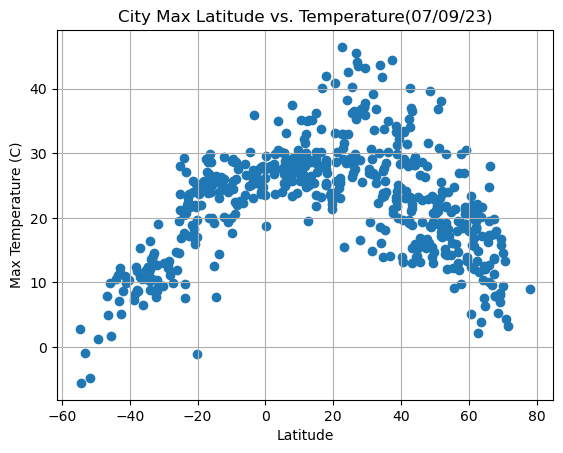

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

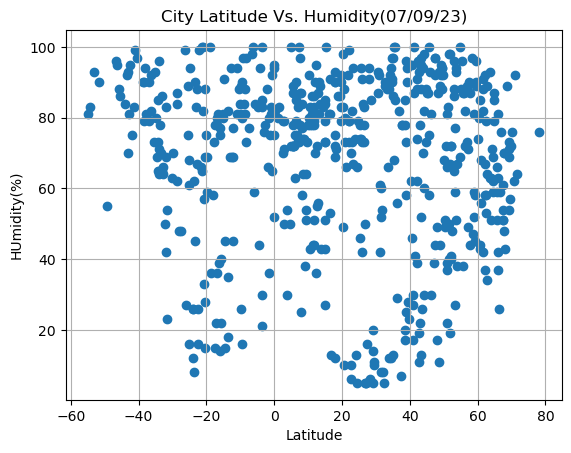

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("HUmidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

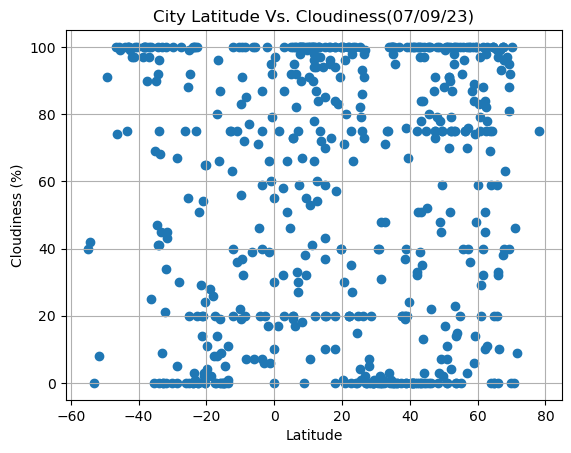

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

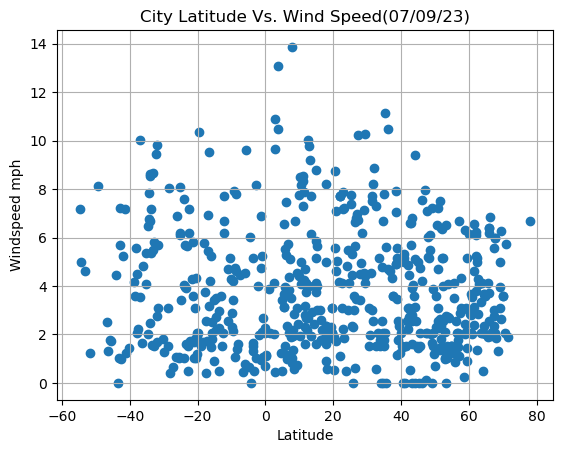

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,text_coordinates):
    
# Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

 # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,georgetown,5.4112,100.3354,29.97,72,20,3.13,MY,1688902410
9,bechar,31.6167,-2.2167,39.18,8,0,8.23,DZ,1688902114
12,north bend,43.4065,-124.2243,12.95,88,100,0.00,US,1688902410
13,jamestown,42.0970,-79.2353,19.45,91,75,3.09,US,1688902410
16,ola,59.5833,151.2833,13.97,90,100,0.91,RU,1688902411


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,24.46,81,83,4.20,ID,1688902409
1,port-aux-francais,-49.3500,70.2167,1.24,55,91,8.14,TF,1688902409
2,waitangi,-43.9535,-176.5597,10.46,84,100,4.47,NZ,1688902409
3,grytviken,-54.2811,-36.5092,-5.56,83,42,5.01,GS,1688902409
4,edinburgh of the seven seas,-37.0676,-12.3116,15.34,79,100,10.04,SH,1688902409


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6062795982356026


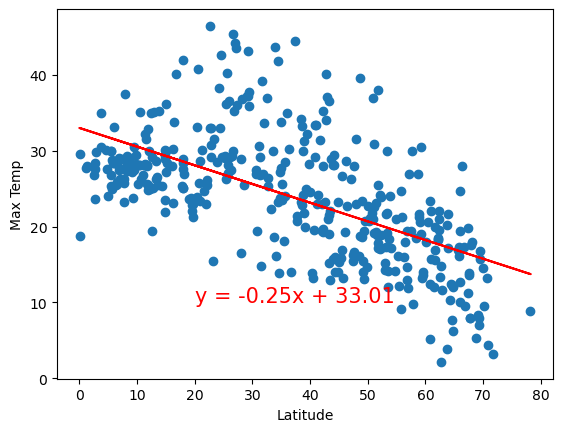

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, (20,10))

The r-squared is: 0.8346876133058384


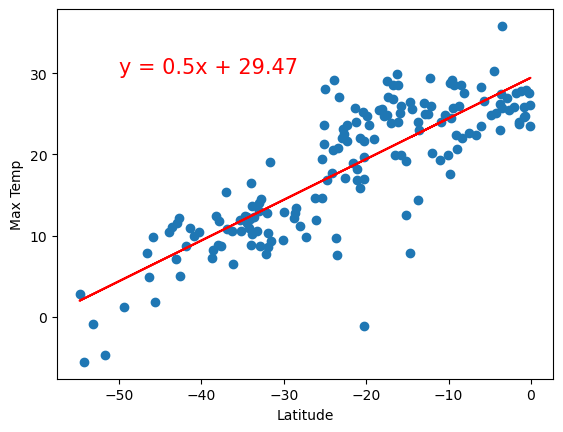

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")

plot_linear_regression(x_values,y_values, (-50,30))

**Discussion about the linear relationship:**  STRONG POSITIVE CORRELATION r=-0.8 AS LATITUDE INCREASE THE TEMP INCREASES

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.051733598682422485


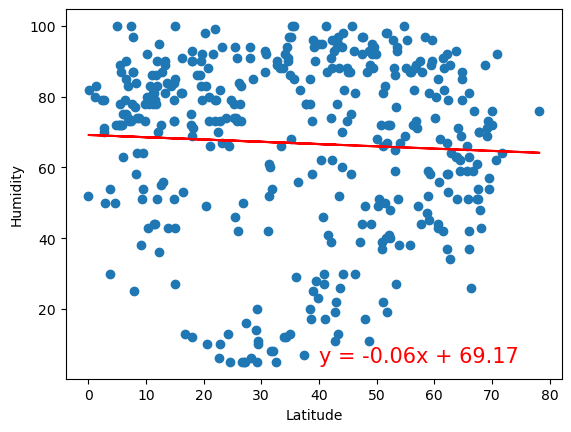

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")

plot_linear_regression(x_values,y_values, (40, 5))

The r-squared is: -0.12439245498167963


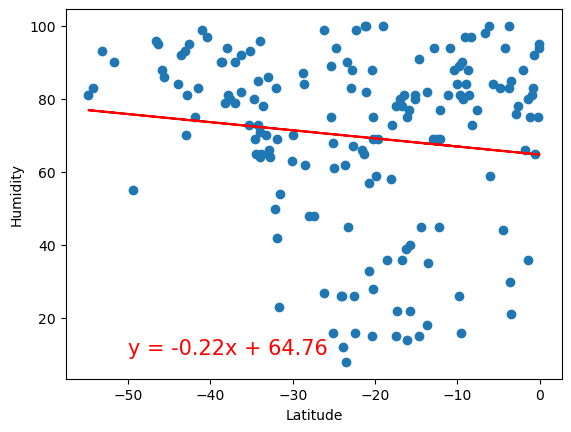

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")

plot_linear_regression(x_values,y_values, (-50, 10))

**Discussion about the linear relationship:**  NONE OR VERY WEAK NEGATIVE CORRELATION r=-0.12

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.04393390251951964


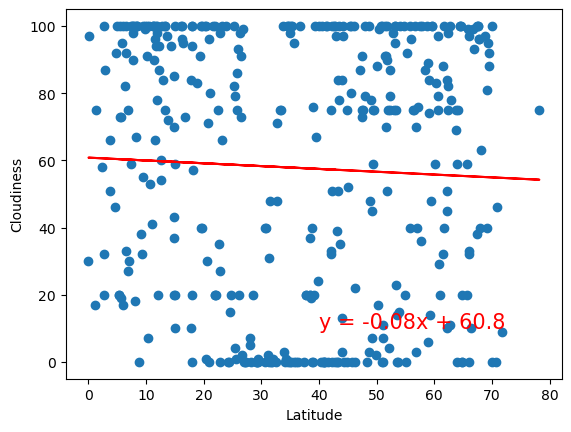

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,(40,10))

The r-squared is: -0.225885060850654


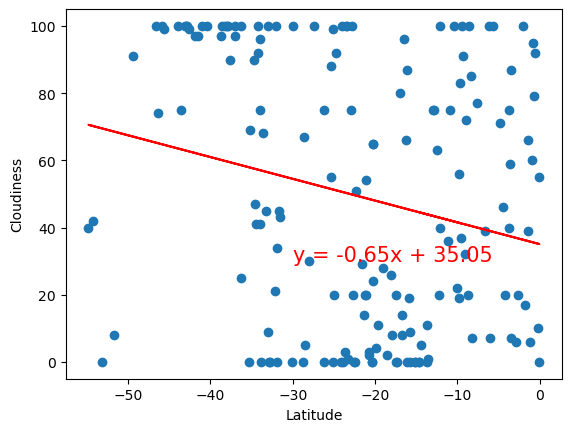

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, (-30,30))

**Discussion about the linear relationship:** WEAK NEGATIVE CORRELATION r=-0.22

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.13950726123275353


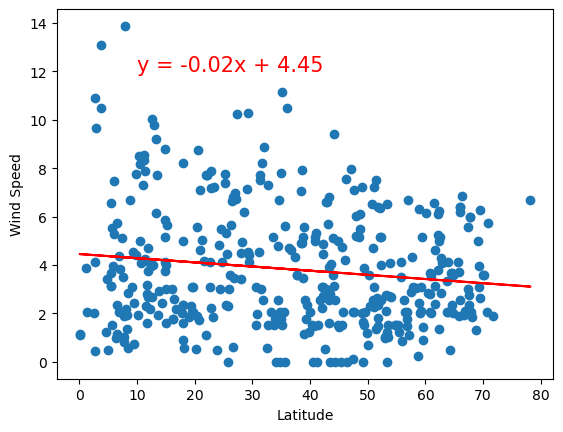

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, (10,12))

The r-squared is: -0.1597968281663233


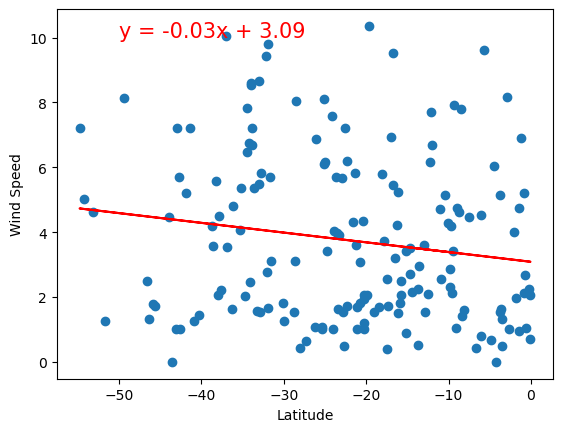

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, (-50,10))

**Discussion about the linear relationship:** NONE OR VERY WEAK NEGATIVE CORRELATION r=-0.15